In [1]:
import numpy as np
from tqdm import tqdm

import xarray as xr
import glob
from pathlib import Path
import matplotlib.pyplot as plt

import sys

sys.path.append("../")
from toffy import streak_detection as sd
from ark.utils import load_utils
%config InlineBackend.figure_formats = ['svg']

In [ ]:
data_dir = Path("../toffy/data/streak")
fovs = [fov.stem for fov in data_dir.glob("*//") if "corrected" not in fov.stem]
fovs

In [ ]:
for fov in tqdm(fovs):

    # Load fov
    fov_data = load_utils.load_imgs_from_tree(data_dir=data_dir, fovs=[fov], dtype=np.int32)

    # Correct streaks
    corrected_channels, streak_data = sd.streak_correction(
        fov_data=fov_data, streak_channel="Noodle", visualization_masks=True
    )
    # Save the corrected channels per fov.
    sd.save_corrected_channels(
        streak_data=streak_data,
        corrected_channels=corrected_channels,
        data_dir=data_dir,
        save_streak_data=True,
    )


In [39]:
fake_data = np.zeros(shape=(1000, 1000, 10), dtype=np.uint8)
fd0 = fake_data[..., 0]

rng = np.random.default_rng(12345)
x_min, = rng.integers(low=0, high = 998, size = 1)
x_max, = rng.integers(low=x_min, high=999, size = 1)
y, = rng.integers(low=0, high=999, size = 1)

ones = np.ones(shape=(x_max-x_min,))
ones

fd0[y, x_min:x_max] = ones

In [36]:

bm = sd._make_binary_mask(fd0)

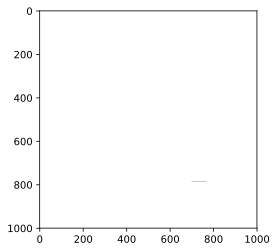

In [37]:
plt.imshow(fd0, cmap = "Greys", interpolation="none")

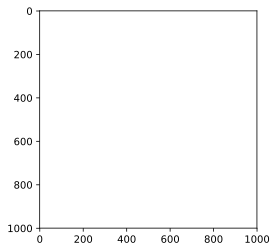

In [38]:
plt.imshow(bm, cmap = "Greys", interpolation="none")

In [45]:
np.all(np.isin(bm, [0,1]))

True